# INFOTECH PRODIGY - TASK-05

### Analyze traffic accident data to identify patterns related to road conditions, whether and time of day. Visualize accident hotspots and contributing factors. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\HP\Documents\Datasets\data_processed.csv")
df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Star_Time,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Wind_Chill(F)_NA,Precipitation_NA
0,0,3,01-01-2017 00:17,37.925392,-122.320595,0.010,Accident on I-80 Westbound at Exit 15 Cutting ...,I-80 E,El Cerrito,Contra Costa,...,01-01-2017 00:17,False,True,False,False,False,False,False,0,1
1,1,3,01-01-2017 00:26,37.878185,-122.307175,0.010,Accident on I-580 Southbound at Exit 12 I-80 I...,I-580 W,Berkeley,Alameda,...,01-01-2017 00:26,False,True,False,False,False,False,False,1,1
2,2,2,01-01-2017 00:53,38.014820,-121.640579,0.000,Accident on Taylor Rd Southbound at Bethel Isl...,Taylor Ln,Oakley,Contra Costa,...,01-01-2017 00:53,False,True,False,False,False,False,False,0,1
3,3,3,01-01-2017 01:18,37.912056,-122.323982,0.010,Lane blocked and queueing traffic due to accid...,Bayview Ave,Richmond,Contra Costa,...,01-01-2017 01:18,False,True,False,False,False,False,False,0,1
4,4,3,01-01-2017 01:20,37.925392,-122.320595,0.010,Queueing traffic due to accident on I-80 Westb...,I-80 E,El Cerrito,Contra Costa,...,01-01-2017 01:20,False,True,False,False,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716750,717285,2,30-08-2017 20:01,34.055160,-118.214070,0.212,At I-10 - Accident.,San Bernardino Fwy E,Los Angeles,Los Angeles,...,30-08-2017 20:01,True,False,False,False,False,False,False,1,1
716751,717286,2,30-08-2017 20:01,34.046740,-118.214800,0.583,Between Cesar E Chavez Ave and I-5/I-10 Northe...,I-5 N,Los Angeles,Los Angeles,...,30-08-2017 20:01,True,False,False,False,False,False,False,1,1
716752,717287,3,30-08-2017 20:03,34.031850,-117.135910,1.216,Between Wabash Ave/Exit 82 and Yucaipa Blvd/Ex...,I-10 E,Redlands,San Bernardino,...,30-08-2017 20:03,False,False,False,False,False,False,False,1,1
716753,717288,4,30-08-2017 20:49,34.277860,-118.608280,1.991,Closed between CA-27/Topanga Canyon Blvd and R...,Ronald Reagan Fwy W,Chatsworth,Los Angeles,...,30-08-2017 20:49,True,False,False,False,False,False,False,1,1


In [3]:
df.shape

(716755, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716755 entries, 0 to 716754
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 716755 non-null  int64  
 1   Severity           716755 non-null  int64  
 2   Start_Time         716755 non-null  object 
 3   Start_Lat          716755 non-null  float64
 4   Start_Lng          716755 non-null  float64
 5   Distance(mi)       716755 non-null  float64
 6   Description        716755 non-null  object 
 7   Street             716755 non-null  object 
 8   City               716755 non-null  object 
 9   County             716755 non-null  object 
 10  State              716755 non-null  object 
 11  Country            716755 non-null  object 
 12  Timezone           716755 non-null  object 
 13  Weather_Timestamp  716755 non-null  object 
 14  Temperature(F)     716755 non-null  float64
 15  Wind_Chill(F)      716755 non-null  float64
 16  Hu

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Country', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Star_Time',
       'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog',
       'Wind_Chill(F)_NA', 'Precipitation_NA'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,716755.0,358573.468198,207074.290893,0.000000,179215.500000,358549.000000,537915.500000,717289.000000
Severity,716755.0,2.388900,0.552793,1.000000,2.000000,2.000000,3.000000,4.000000
Start_Lat,716755.0,36.379513,5.054914,24.571202,33.255533,35.842911,40.512614,49.000580
Start_Lng,716755.0,-94.149685,16.967217,-124.623833,-114.777503,-88.007957,-80.727768,-67.113167
Distance(mi),716755.0,0.277726,1.375388,0.000000,0.000000,0.000000,0.020000,254.399994
Temperature(F),716755.0,63.060830,17.753168,-77.800000,52.000000,64.900000,75.900000,167.000000
Wind_Chill(F),716755.0,30.712678,5.989208,-38.200000,31.000000,31.000000,31.000000,109.000000
Humidity(%),716755.0,65.241225,22.171237,2.000000,49.000000,67.000000,84.000000,100.000000
Pressure(in),716755.0,30.008107,0.278604,0.020000,29.900000,30.010000,30.120000,31.030000
Visibility(mi),716755.0,9.228232,2.764598,0.000000,10.000000,10.000000,10.000000,80.000000


In [7]:
df.describe(include=object)

,Start_Time,Description,Street,City,County,State,Country,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Civil_Twilight,Star_Time
count,716755,716755,716755,716755,716755,716755,716755,716755,716755,716755,716755,716755,716755
unique,293252,472353,74927,8545,1481,49,1,4,119598,10,78,2,293252
top,15-05-2017 09:22,At I-85 - Accident.,I-95 N,Houston,Los Angeles,CA,US,US/Eastern,28-11-2017 07:53,S,Clear,Day,15-05-2017 09:22
freq,75,184,8637,30303,52714,152039,716755,331537,181,139126,277317,565635,75


In [8]:
df.isna().sum()

ID                   0
Severity             0
Start_Time           0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
City                 0
County               0
State                0
Country              0
Timezone             0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Star_Time            0
Clear                0
Cloud                0
Rain                 0
Heavy_Rain           0
Snow                 0
Heavy_Snow           0
Fog        

In [9]:
df.duplicated().sum()

0

In [10]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()
city_acc

,City,count
0,Houston,30303
1,Dallas,17231
2,Charlotte,16839
3,Los Angeles,15279
4,Austin,15178
...,...,...
8540,Benwood,1
8541,Wamego,1
8542,Green Isle,1
8543,Indian Head,1


C:\Users\HP\AppData\Local\Temp\ipykernel_9312\1052805951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'City', y= 'count', data= city_acc.head(10), palette= 'viridis')


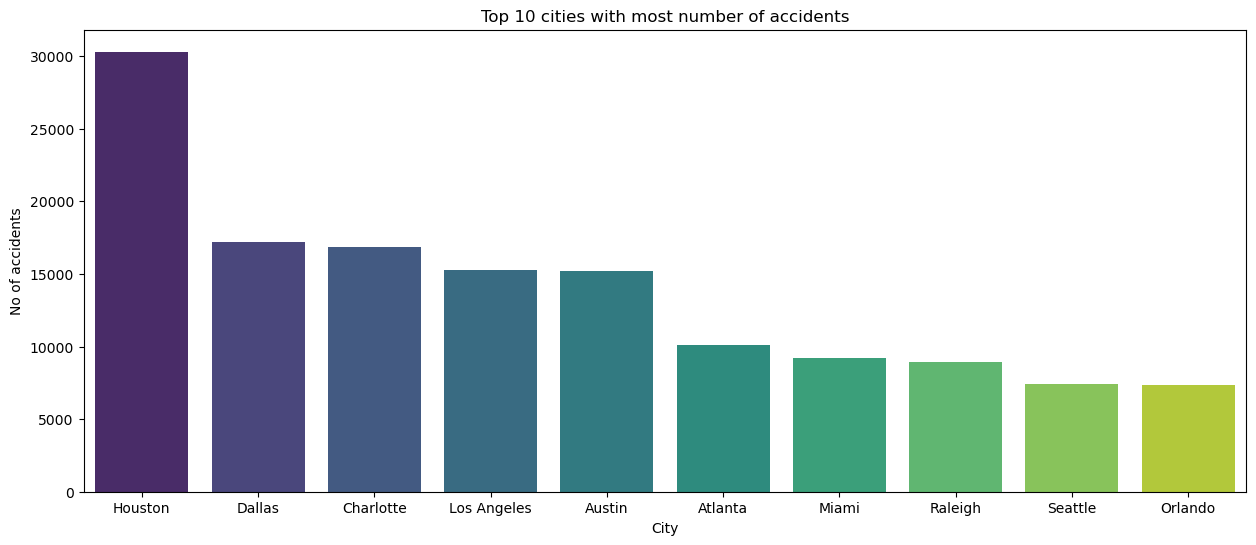

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'City', y= 'count', data= city_acc.head(10), palette= 'viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9312\2328091220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'City', y= 'count', data= city_acc.tail(10), palette= 'viridis')


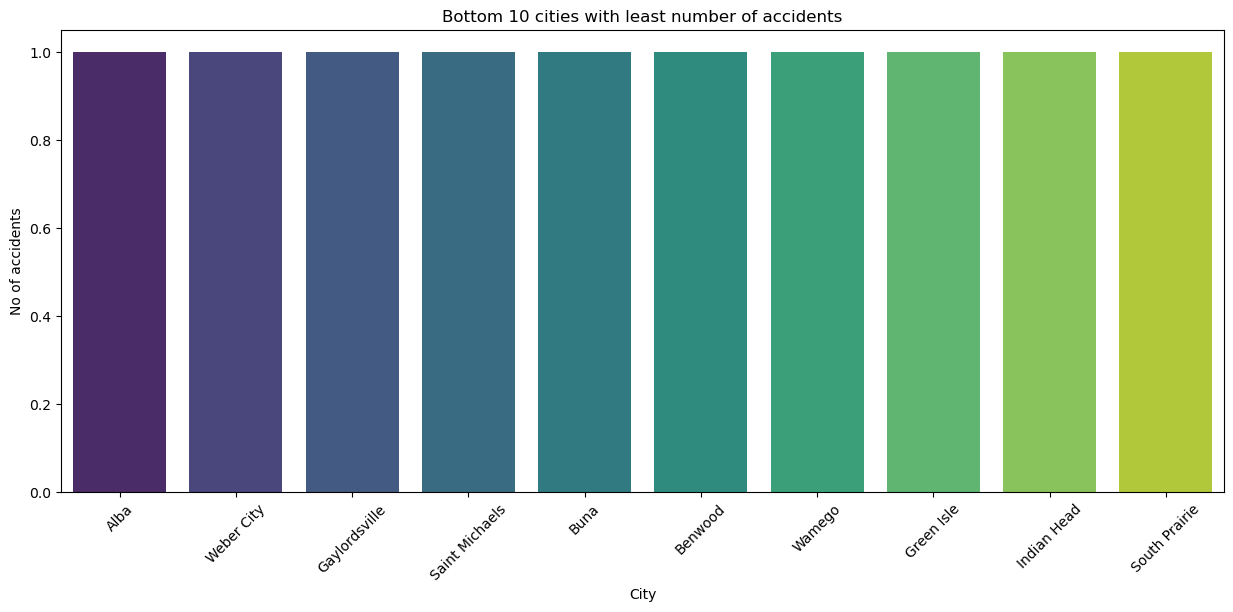

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x= 'City', y= 'count', data= city_acc.tail(10), palette= 'viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

In [13]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,152039
1,TX,85588
2,FL,60616
3,NY,36979
4,NC,34107
5,SC,28035
6,MI,27469
7,PA,26905
8,IL,25309
9,GA,22071


C:\Users\HP\AppData\Local\Temp\ipykernel_9312\75465560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'State', y= 'count', data= state_acc.head(5), palette= 'rocket')


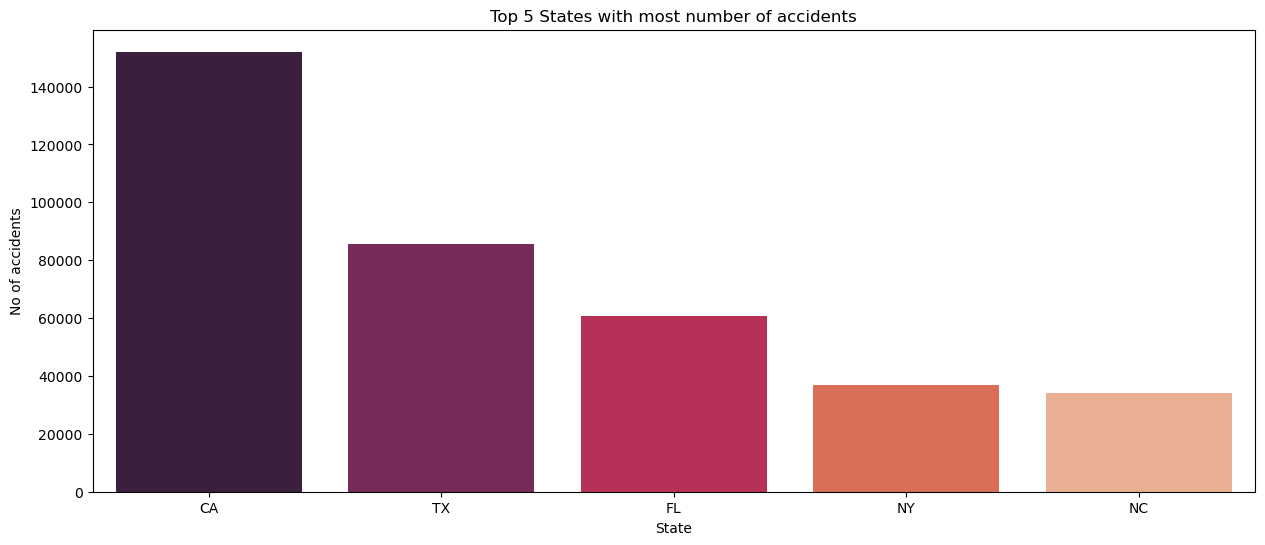

C:\Users\HP\AppData\Local\Temp\ipykernel_9312\75465560.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'State', y= 'count', data= state_acc.tail(5), palette= 'rocket')


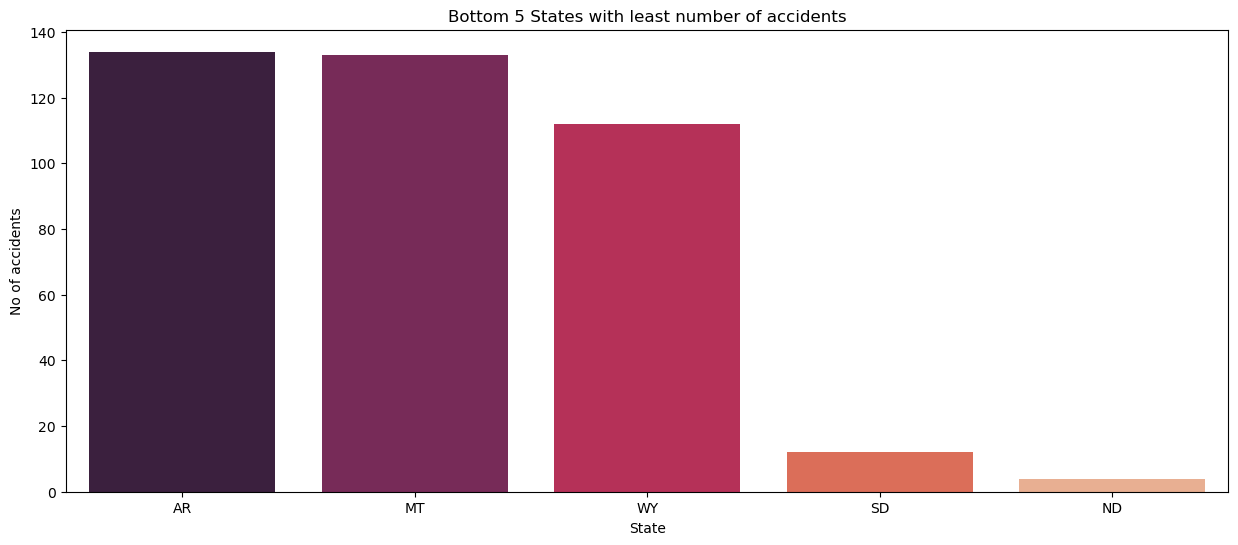

In [14]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x= 'State', y= 'count', data= state_acc.head(5), palette= 'rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()
## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x= 'State', y= 'count', data= state_acc.tail(5), palette= 'rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

In [15]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

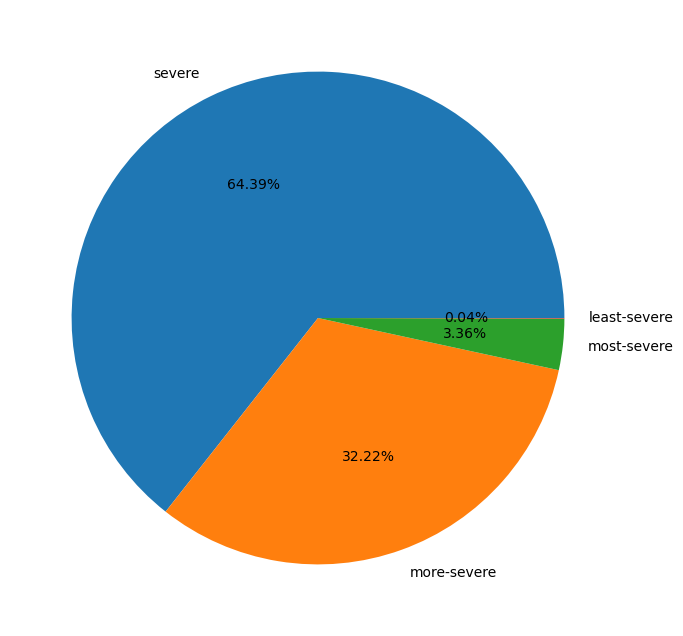

In [16]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [17]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year
# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2017-01-01 00:17:00  2017.0
1 2017-01-01 00:26:00  2017.0
2 2017-01-01 00:53:00  2017.0
3 2017-01-01 01:18:00  2017.0
4 2017-01-01 01:20:00  2017.0


In [18]:
df['Year'].value_counts()

Year
2017.0    285290
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9312\2808628251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Year', y= 'count', data= year_count, palette= 'rocket_r')


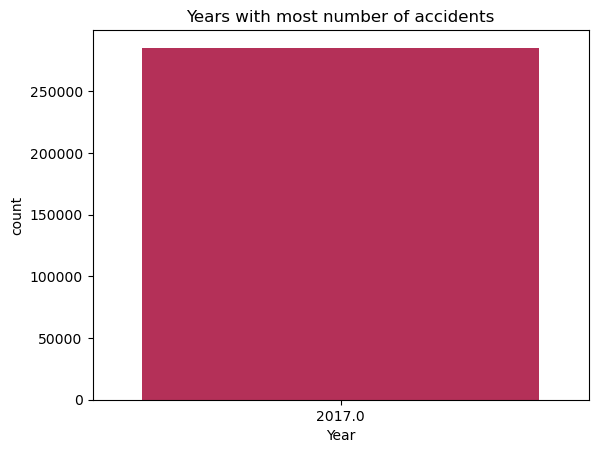

In [19]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x= 'Year', y= 'count', data= year_count, palette= 'rocket_r')
plt.title("Years with most number of accidents")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9312\1844928386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')


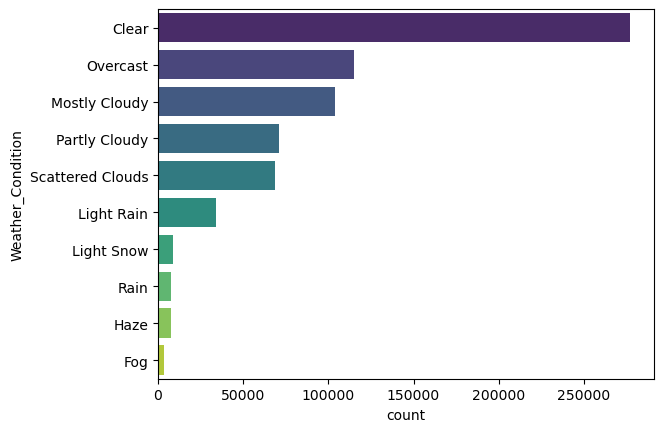

In [28]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')
plt.show()

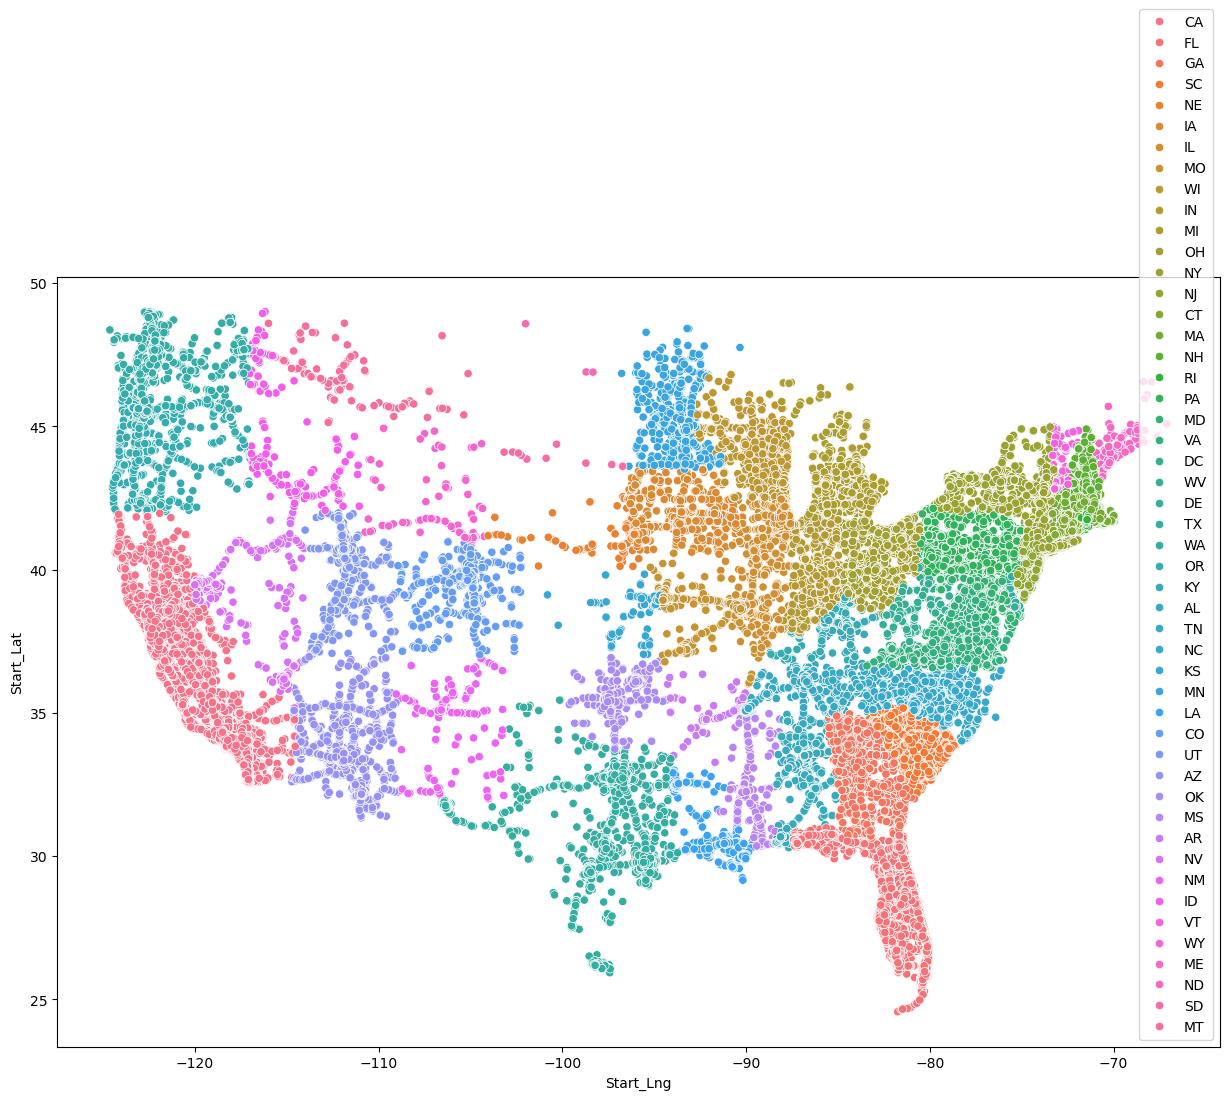

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()

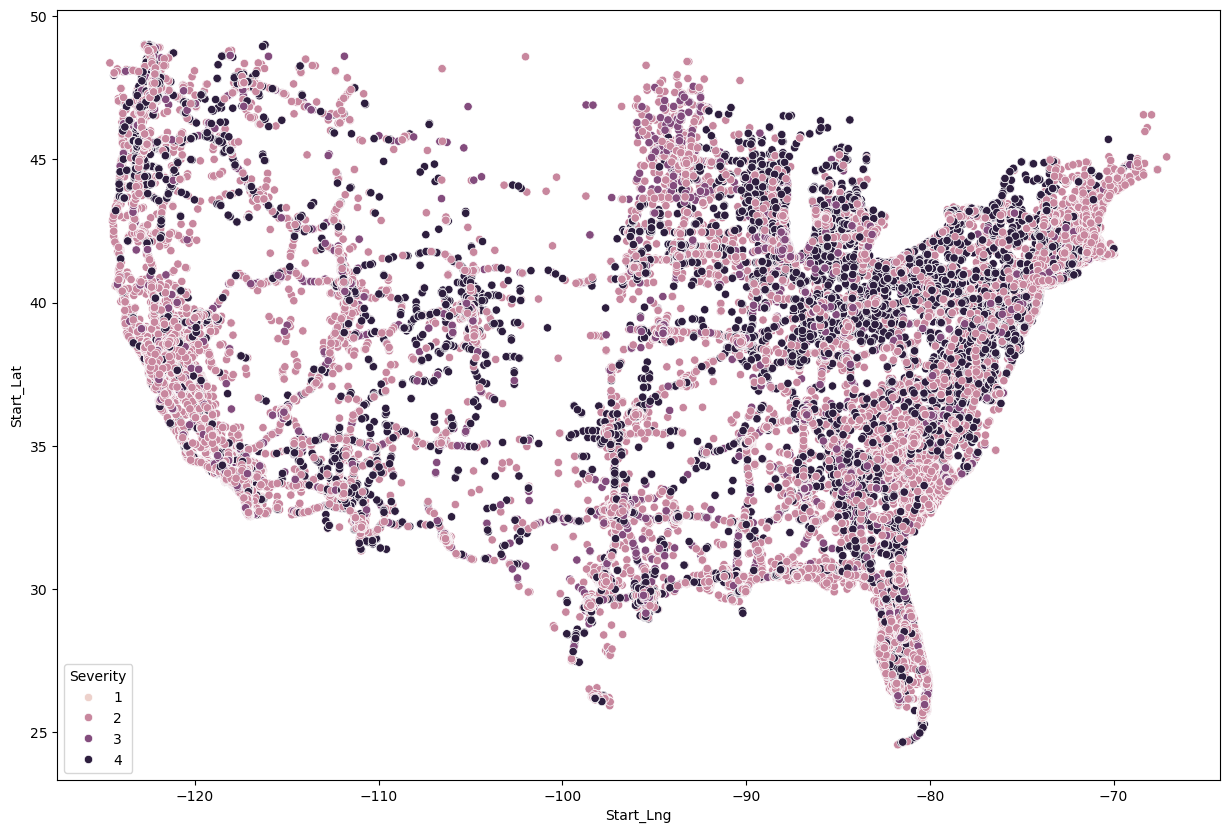

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()

In [60]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# Extract the time and store it in a new column 'Time'
df['Time'] = df['Start_Time'].dt.time

In [62]:
# Function to categorize time
def categorize_time(time):
    if pd.isna(time):
        return 'Unknown'
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

In [64]:
# Apply the function to create a new column 'Time_Zone'
df['Time_Zone'] = df['Time'].apply(categorize_time)

In [65]:
# Filter out 'Unknown' time zones for plotting
filtered_df = df[df['Time_Zone'] != 'Unknown']

In [66]:
# Count the number of accidents in each timezone
time_zone_counts = filtered_df['Time_Zone'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_9312\827212901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, palette='rocket')


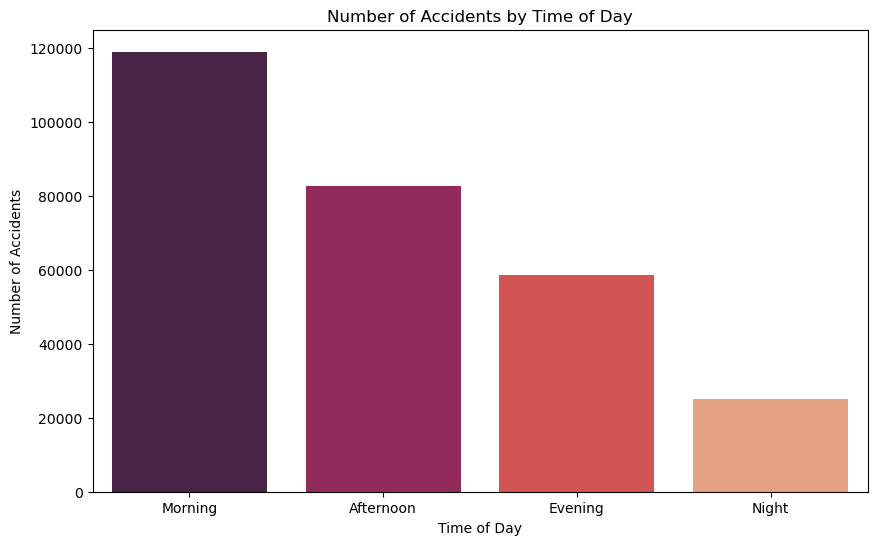

In [67]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, palette='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.show()

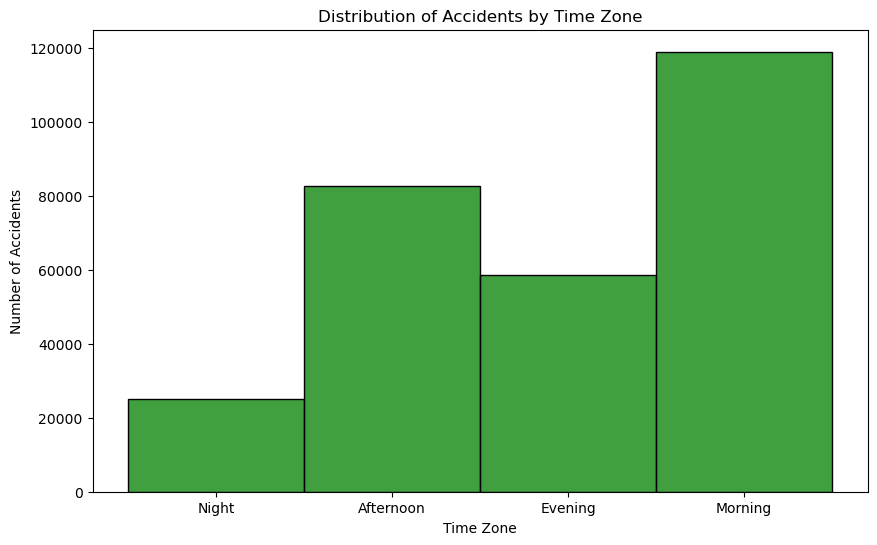

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='green')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

# End Of Project